In [1]:
import pandas as pd

# Czyszczenie danych

In [2]:
# Wczytaj dane z pliku CSV
file_path = 'data/internet_service_churn — kopia.csv'
data = pd.read_csv(file_path)

In [3]:
# Pokaż rozmiar danych przed usunięciem wierszy
print("Rozmiar danych przed usunięciem wierszy z None:")
print(data.shape)

Rozmiar danych przed usunięciem wierszy z None:
(72274, 11)


In [4]:
# Usuń wiersze z brakującymi wartościami
cleaned_data = data.dropna()

In [5]:
# Pokaż rozmiar danych po usunięciu wierszy
print("\nRozmiar danych po usunięciu wierszy z None:")
print(cleaned_data.shape)


Rozmiar danych po usunięciu wierszy z None:
(50375, 11)


In [6]:
# Zapisz oczyszczone dane do nowego pliku CSV w folderze 'data'
output_path = 'data/internet_service_churn_clean_data.csv'
cleaned_data.to_csv(output_path, index=False)

print(f"Oczyszczone dane zostały zapisane do pliku: {output_path}")

Oczyszczone dane zostały zapisane do pliku: data/internet_service_churn_clean_data.csv


# Project

In [7]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, auc, classification_report, precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import joblib

In [8]:
# Read csv data file
df = pd.read_csv("data/internet_service_churn_clean_data.csv")

# drop user id
df.drop('id', axis=1, inplace=True)

print(df.shape)

# Data preview
print("\nThe first 5 rows of data:")
print(df.head())

(50375, 10)

The first 5 rows of data:
   is_tv_subscriber  is_movie_package_subscriber  subscription_age  bill_avg  \
0                 1                            0             11.95        25   
1                 1                            0              8.91        16   
2                 1                            1             11.94        32   
3                 0                            0              8.96        18   
4                 1                            1              8.44        17   

   reamining_contract  service_failure_count  download_avg  upload_avg  \
0                0.14                      0           8.4         2.3   
1                0.00                      0          13.7         0.9   
2                1.38                      0          69.4         4.0   
3                0.00                      0          21.3         2.0   
4                0.00                      0           9.9         1.1   

   download_over_limit  churn  
0  

In [9]:
# Check if there are any variables with missing values
missing_values = df.isna().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64


# Data Exploration

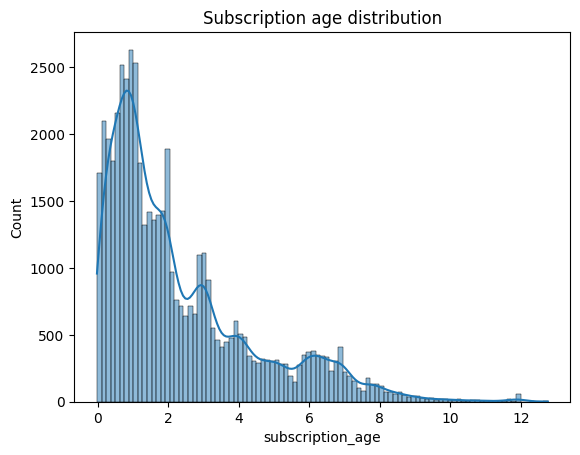

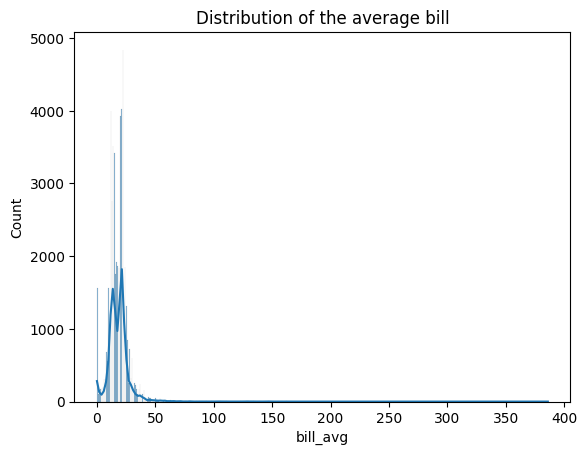

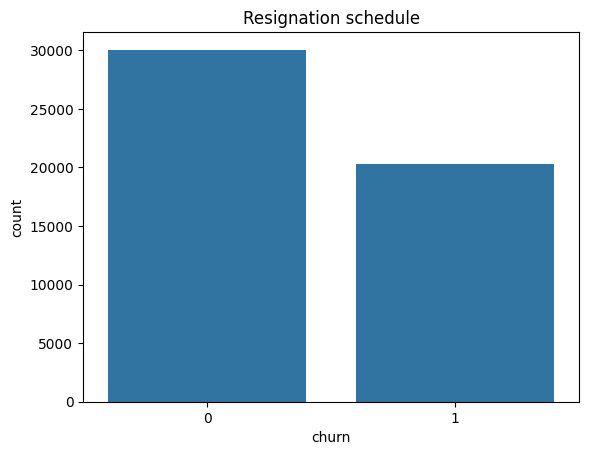

In [10]:
# Distribution of the 'subscription_age' variable_age'
sns.histplot(df['subscription_age'], kde=True)
plt.title('Subscription age distribution')
plt.show()

# Distribution of the 'bill_avg' variable
sns.histplot(df['bill_avg'], kde=True)
plt.title('Distribution of the average bill')
plt.show()

# Distribution of the 'churn' variable
sns.countplot(x='churn', data=df)
plt.title('Resignation schedule')
plt.show()

In [11]:
# NaN in 'reamining_contract' means no contract, so fill with 0
df.fillna({'reamining_contract': 0}, inplace=True)

# Or removing a column if it is not useful enough
# data.drop('reamining_contract', axis=1, inplace=True)
     
# NaN in the 'download_avg' and 'upload_avg' columns indicates inactivity, so fill with 0
df.fillna({'download_avg': 0}, inplace=True)
df.fillna({'upload_avg': 0}, inplace=True)

# Check if there are still NaNs in the columns
print(df.isna().sum())

is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64


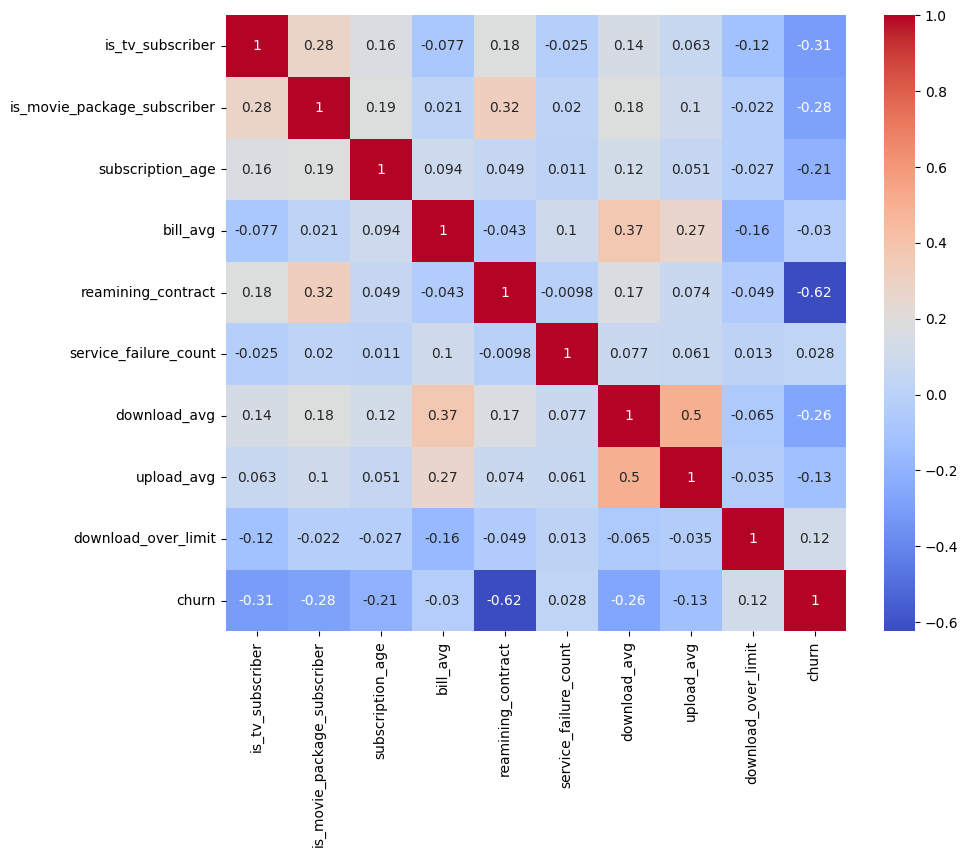

In [12]:
# Correlation matrix
corr = df.corr()

# Visualization of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Data standarization

In [13]:
# Selection of features for normalization
features_to_scale = ['subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count', 'download_avg', 'upload_avg']

# Feature normalization
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])
print(df.head())

   is_tv_subscriber  is_movie_package_subscriber  subscription_age  bill_avg  \
0                 1                            0          4.582861  0.658180   
1                 1                            0          3.137774 -0.237735   
2                 1                            1          4.578108  1.355003   
3                 0                            0          3.161542 -0.038643   
4                 1                            1          2.914356 -0.138189   

   reamining_contract  service_failure_count  download_avg  upload_avg  \
0           -0.821605              -0.341318     -0.718809   -0.248243   
1           -1.023342              -0.341318     -0.629774   -0.385951   
2            0.965211              -0.341318      0.305930   -0.081026   
3           -1.023342              -0.341318     -0.502102   -0.277752   
4           -1.023342              -0.341318     -0.693610   -0.366278   

   download_over_limit  churn  
0                    0      0  
1         

In [14]:
# Splitting data into features (X) and target variable (y)
X = df.drop(columns=['churn'])
y = df['churn']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

# Supervised Machine Learning Models

In [16]:
# Support Vector Machine (SVM) Model with rbf kernel
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)

# Logistic Regression Model (simpler model for comparison)
lr_model = LogisticRegression(random_state=42)

# Define the Gradient Boosting model
model_GB = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [17]:
# Perform Cross-Validation and print results
def perform_cross_validation(model, X, y, cv=3):  # Reduced to 3 folds
    print(f"Performing cross-validation for {model.__class__.__name__}...")
    # Cross-validation for accuracy
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    
    print(f"Cross-Validation Results for {model.__class__.__name__}:")
    print(f"Accuracy: {np.mean(accuracy):.2f} (+/- {np.std(accuracy):.2f})")
    print("-" * 50)

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

# Training Models

In [19]:
# Train the SVM model with linear kernel
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [20]:
# Train the Random Forest model
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [21]:
# Train the Logistic Regression model
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [22]:
# Train the Gradient Boosting Classifier
model_GB.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

# Evaluate Models

In [23]:
def evaluate_model(X_test, y_test, model):
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)
    print(f"Evaluating {model_name}...")
    # Calculating metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Displaying the results
    print(f"{model_name} Results:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Evaluating SVC...
SVC Results:
Accuracy: 0.91
Recall: 0.85
Precision: 0.91
F1 Score: 0.88


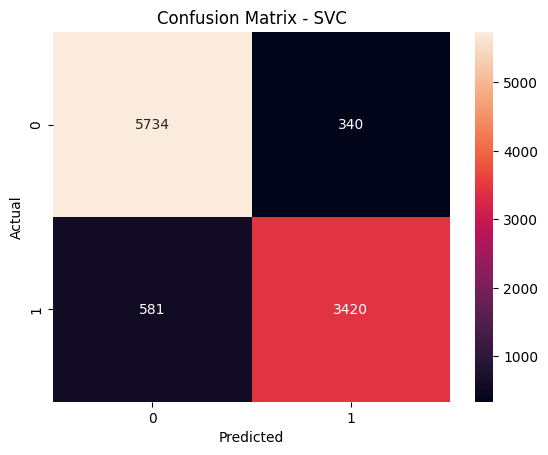

In [24]:
# Evaluate SVM Model
evaluate_model(X_test, y_test, svm_model)

Evaluating RandomForestClassifier...
RandomForestClassifier Results:
Accuracy: 0.95
Recall: 0.89
Precision: 0.99
F1 Score: 0.94


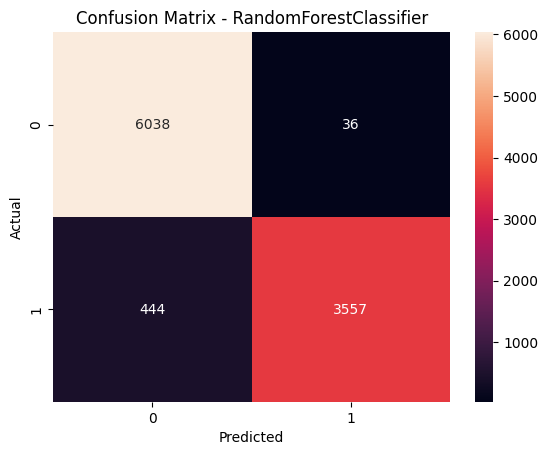

In [25]:
# Evaluate Random Forest Model
evaluate_model(X_test, y_test, rf_model)

Evaluating LogisticRegression...
LogisticRegression Results:
Accuracy: 0.86
Recall: 0.84
Precision: 0.82
F1 Score: 0.83


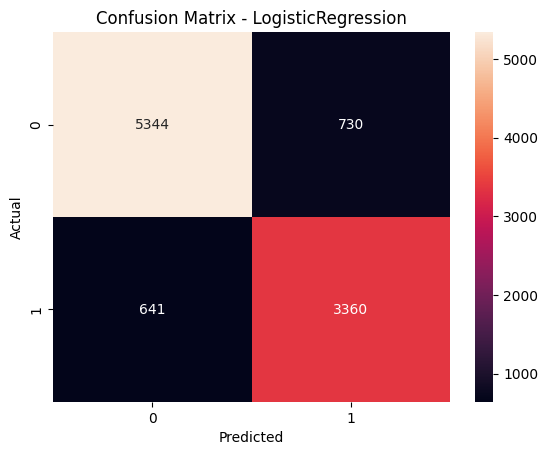

In [26]:
# Evaluate Logistic Regression Model
evaluate_model(X_test, y_test, lr_model)

# Evaluate Gradient Boosting Classifier

Evaluating GradientBoostingClassifier...
GradientBoostingClassifier Results:
Accuracy: 0.95
Recall: 0.88
Precision: 0.99
F1 Score: 0.93


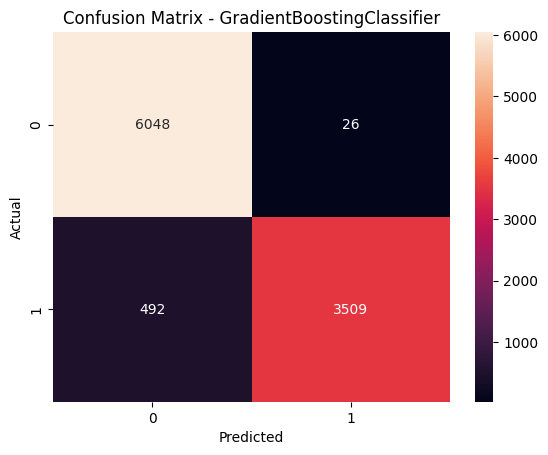

In [27]:
evaluate_model(X_test, y_test, model_GB)

# ROC and Precision-Recall curves

In [28]:
# Evaluate the model on the test set
y_pred = model_GB.predict(X_test) 
y_pred_prob = model_GB.predict_proba(X_test)[:, 1]

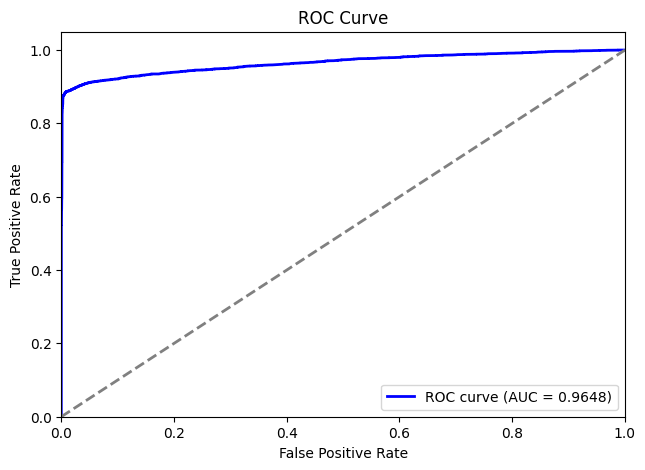

In [29]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(16, 5))

# Subplot: ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

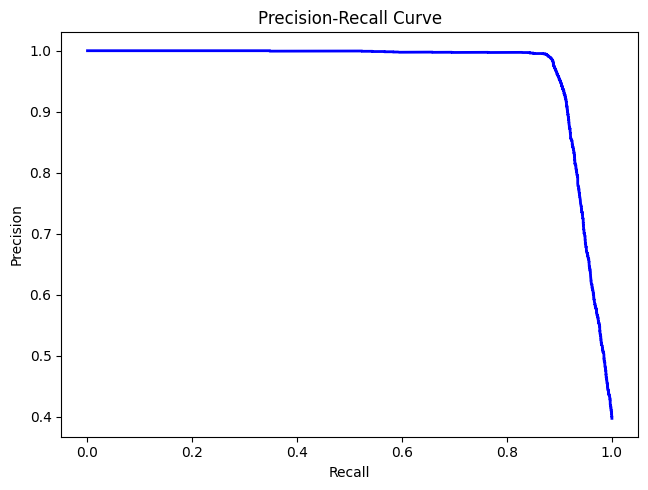

In [30]:
plt.figure(figsize=(12.5, 5))
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

# Deep Learning model - Dense Neural Net

In [31]:
features_num = X_train.shape[1]

In [32]:
NN_model = Sequential([
    Input(shape=(features_num,)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
NN_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Set up EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [33]:
# 6. Training the Model

print("Training the model...")
history = NN_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Training the model...
Epoch 1/50
504/504 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7583 - loss: 0.5113 - val_accuracy: 0.8810 - val_loss: 0.3137
Epoch 2/50
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8705 - loss: 0.3559 - val_accuracy: 0.8969 - val_loss: 0.2898
Epoch 3/50
504/504 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8858 - loss: 0.3258 - val_accuracy: 0.9104 - val_loss: 0.2742
Epoch 4/50
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8982 - loss: 0.3070 - val_accuracy: 0.9129 - val_loss: 0.2631
Epoch 5/50
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9049 - loss: 0.2947 - val_accuracy: 0.9182 - val_loss: 0.2533
Epoch 6/50
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9118 - loss: 0.2762 - val_accuracy: 0.9232 - val_loss: 0.2437
Epoch 7/50
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9126 - loss: 0.2739 - val_accuracy: 0.9243 - val_loss: 0.2385
Epoch 8/50
504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9173 - loss: 0.2

In [34]:
# 7. Evaluating the Model

print("Evaluating the model...")
y_pred_train = NN_model.predict(X_train)
y_pred_test = NN_model.predict(X_test)

# Convert probabilities to binary predictions
y_pred_train = (y_pred_train > 0.5).astype(int)
y_pred_test = (y_pred_test > 0.5).astype(int)

def evaluate_model(y_true, y_pred, dataset_type="Test"):
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"{dataset_type} Set Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix - {dataset_type} Set')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Evaluating the model...
1260/1260 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
315/315 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Training Set Evaluation:
Accuracy: 0.93
Recall: 0.86
Precision: 0.97
F1 Score: 0.91


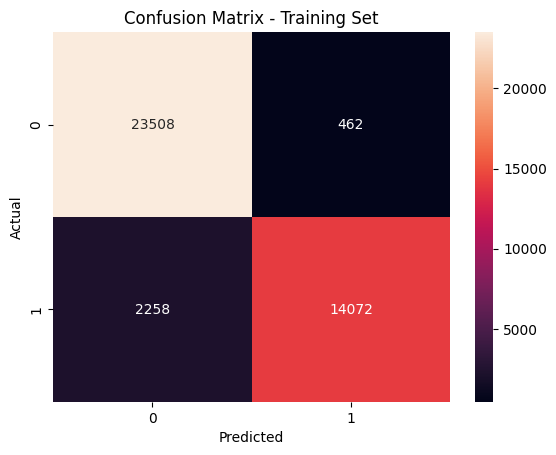

Test Set Evaluation:
Accuracy: 0.93
Recall: 0.86
Precision: 0.97
F1 Score: 0.91


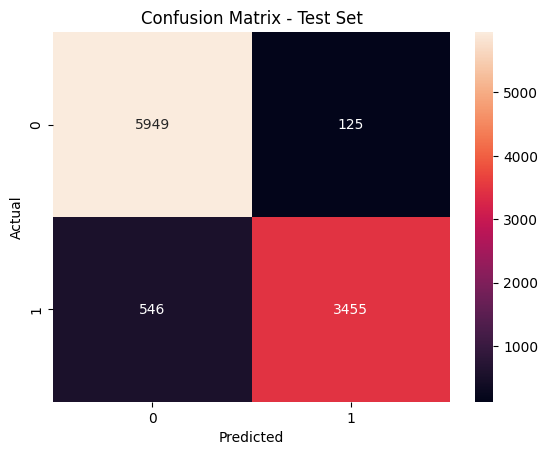

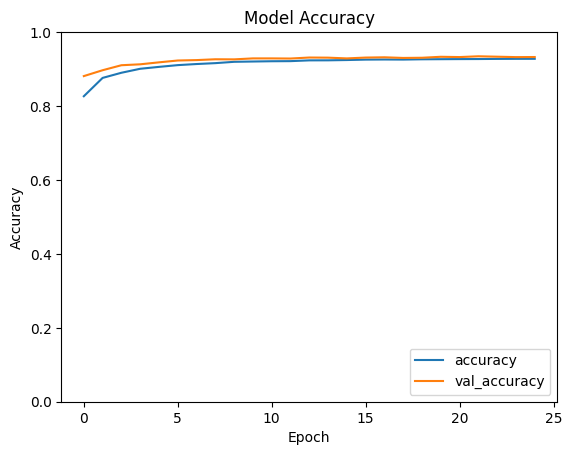

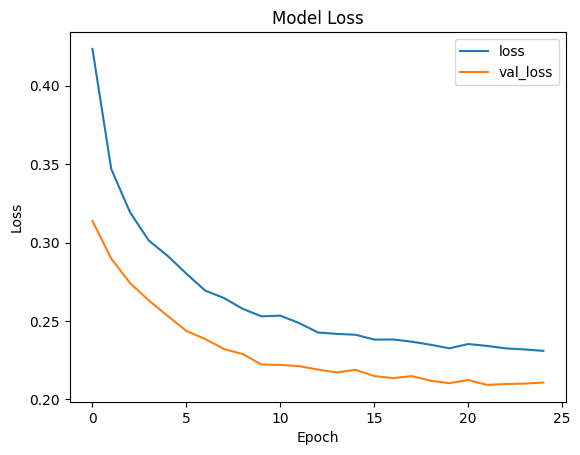

In [35]:
# Evaluate on training set
evaluate_model(y_train, y_pred_train, "Training")

# Evaluate on test set
evaluate_model(y_test, y_pred_test)

# 8. Plotting Training History

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.show()